# Imports

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Analysis

In [70]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
data = data.drop(data.columns[0], axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
data.shape

(150, 5)

In [73]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Data Visualization

## Scattred Graph for 'Sepal Length VS Petal Lenght' and 'Sepal Width VS Petal Width'.

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

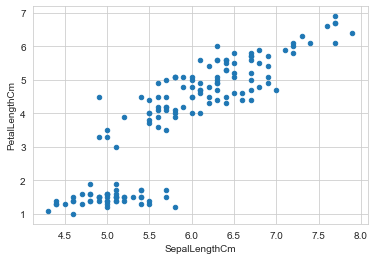

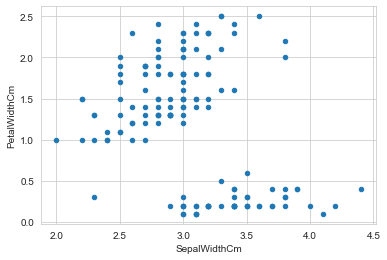

In [76]:
data.plot(kind='scatter', x='SepalLengthCm', y='PetalLengthCm')
data.plot(kind='scatter', x='SepalWidthCm', y='PetalWidthCm')

## Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

<AxesSubplot:>

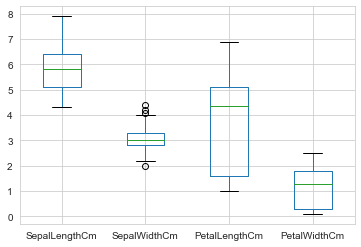

In [77]:
data.boxplot()

## Scattered classification graph of iris-setosa, iris-versicolor and iris-virginica for 'Petal Length' and 'Sepal Length'.

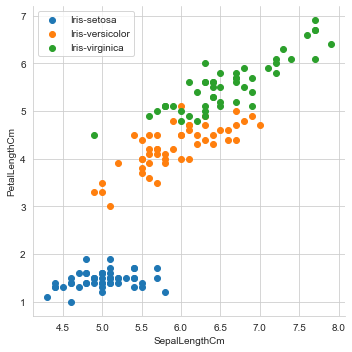

In [78]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='Species', height=5).map(plt.scatter, 'SepalLengthCm', 'PetalLengthCm')
plt.legend()

## Scattered classification graph of iris-setosa, iris-versicolor and iris-virginica for 'Petal Width' and 'Sepal Width'.

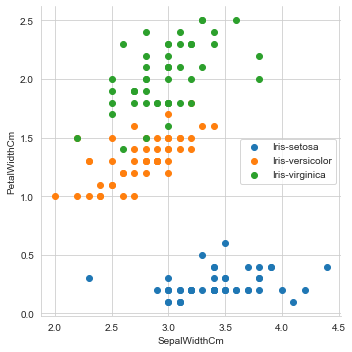

In [79]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='Species', height=5).map(plt.scatter, 'SepalWidthCm', 'PetalWidthCm')
plt.legend()

## A pair plot allows us to see both distribution of single variables and relationships between two variables.

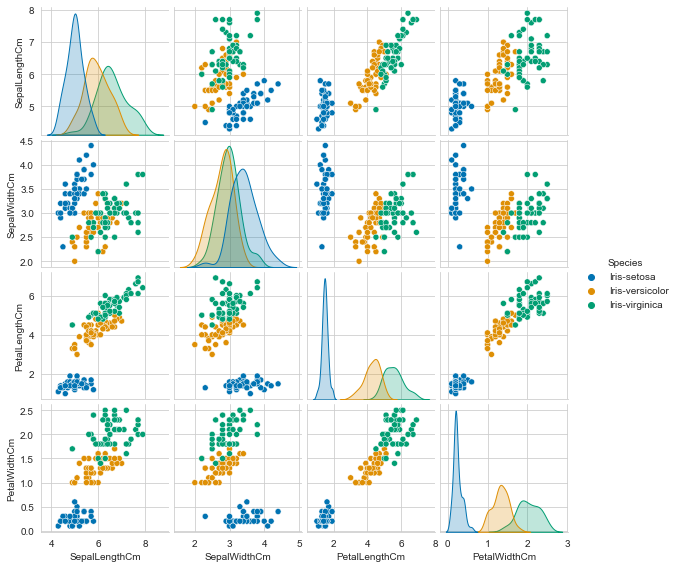

In [80]:
sns.pairplot(data, hue='Species', height=2, palette='colorblind')

## A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader.

<AxesSubplot:>

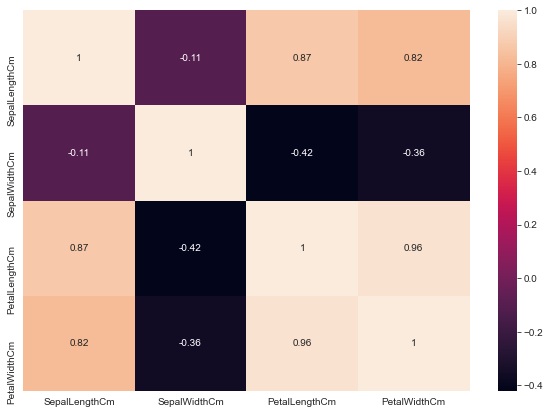

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

## A Clustermap allows you to see, at a glance, the aspects of the subject about which you have the most to say, so it can help you choose how to focus a broad subject for writing.

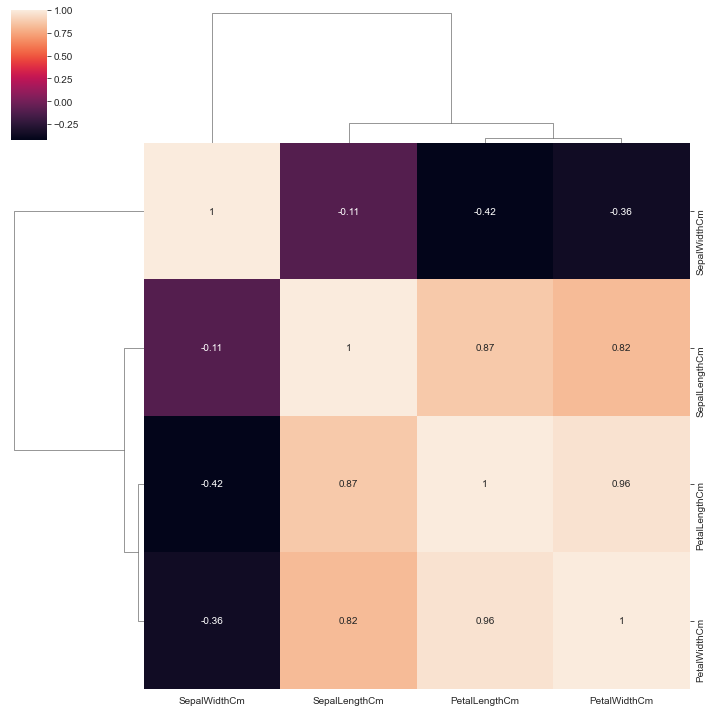

In [82]:
sns.clustermap(data.corr(), annot=True)

## FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

In [83]:
def kde_plot(feature):
    facet = sns.FacetGrid(data, hue='Species', aspect=4, palette='colorblind')
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, data[feature].max()))
    plt.title(feature.title())
    plt.show()

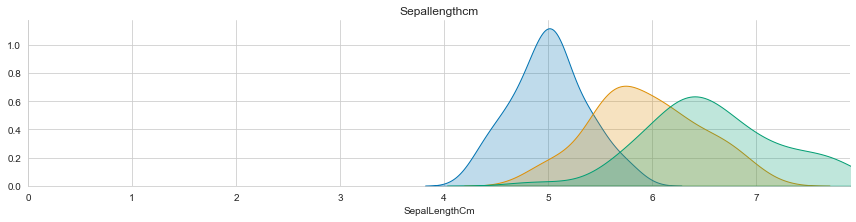

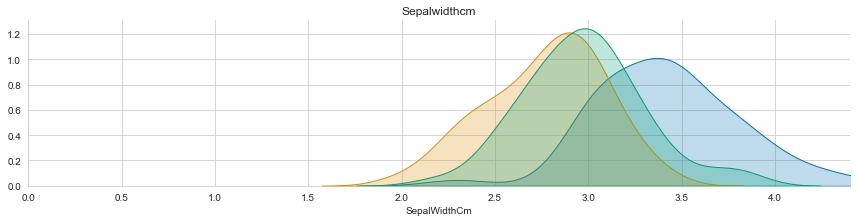

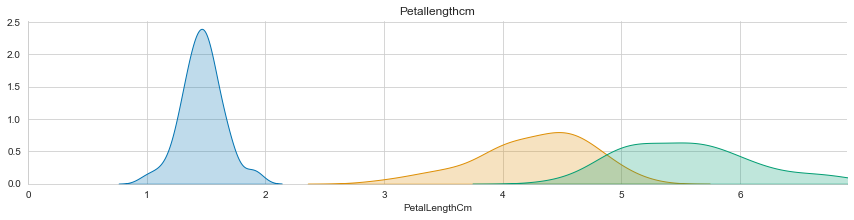

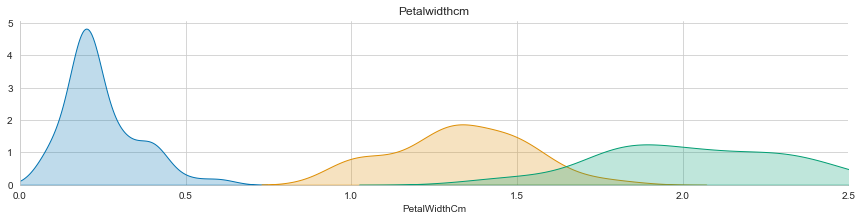

In [84]:
kde_plot('SepalLengthCm')
kde_plot('SepalWidthCm')
kde_plot('PetalLengthCm')
kde_plot('PetalWidthCm')

In [85]:
def cat_plot(feature):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    data[feature].value_counts().plot.pie(colors=['blue', 'lightblue', 'darkblue'], labels=data[feature], shadow=True, startangle=180, ax=axes[0][0], autopct='%.0f%%')
    data[feature].value_counts().plot.bar(ax = axes[0][1])
    sns.scatterplot(x=data.PetalLengthCm, y=data.SepalLengthCm, hue=data[feature], ax=axes[1][0], palette='Pastel1')
    sns.stripplot(x=data[feature], y=data.PetalLengthCm, hue=data.SepalLengthCm, ax=axes[1][1], palette='Pastel1')
    fig.suptitle("Count of "+feature.title())
    plt.show()

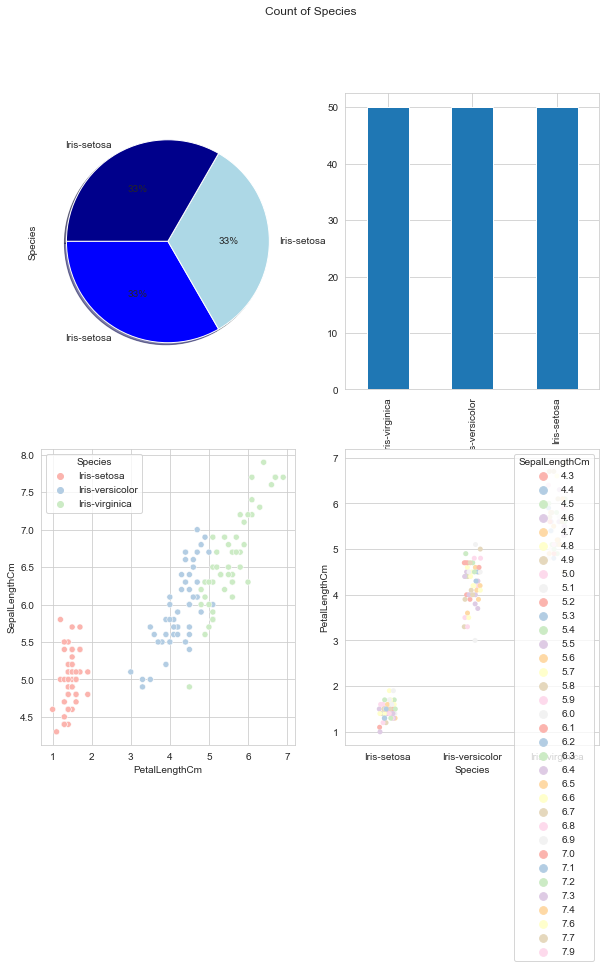

In [86]:
cat_plot('Species')

In [87]:
import pingouin as pg 

In [88]:
def other_plots(feature):
    fig,axes=plt.subplots(3,2,figsize=(10,12))
    sns.stripplot(x=data.Species,y=data[feature],ax=axes[1][1],palette='cool_r')
    sns.histplot(x=data[feature],kde=True,bins=10,ax=axes[0][0],palette='cool_r')    
    pg.qqplot(data[feature],dist='norm',ax=axes[0][1])
    sns.boxplot(y=data[feature],x=data.Species,hue='Species',data=data,ax=axes[2][0],palette='cool_r')
    sns.violinplot(y=data[feature],x=data.Species,hue='Species',data=data,ax=axes[2][1],palette='cool_r')
    sns.barplot(x=data.Species,y=data[feature],ax=axes[1][0],palette='cool_r')
    plt.suptitle(feature.title())
    plt.show()

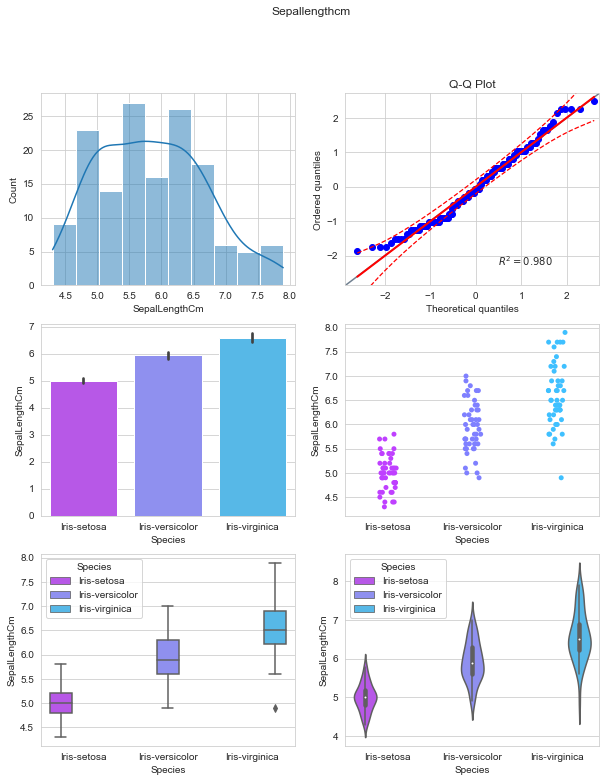

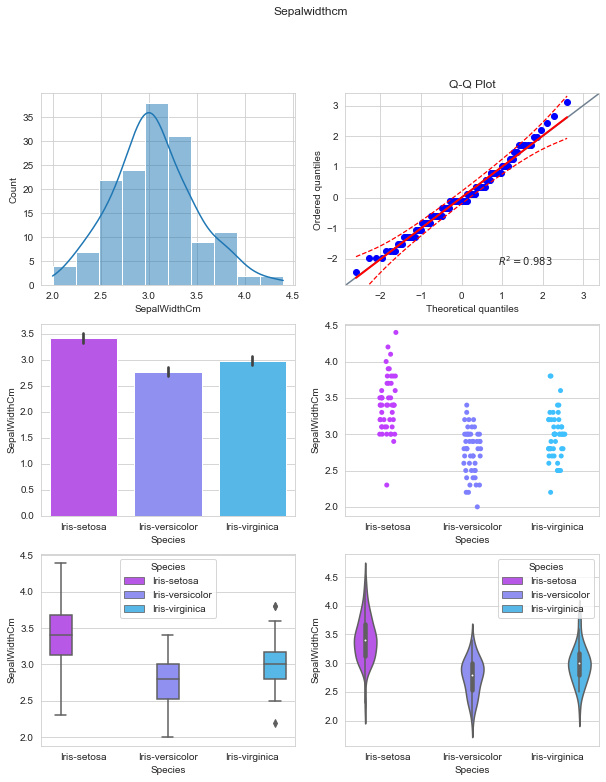

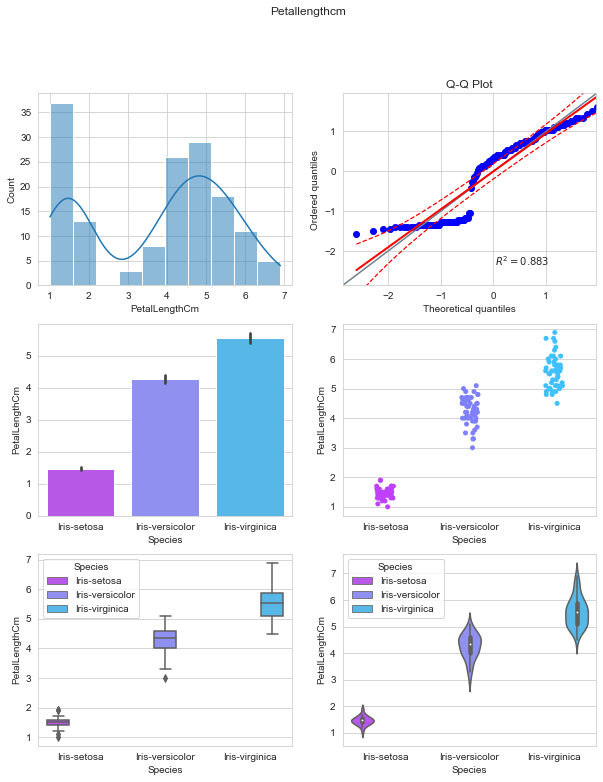

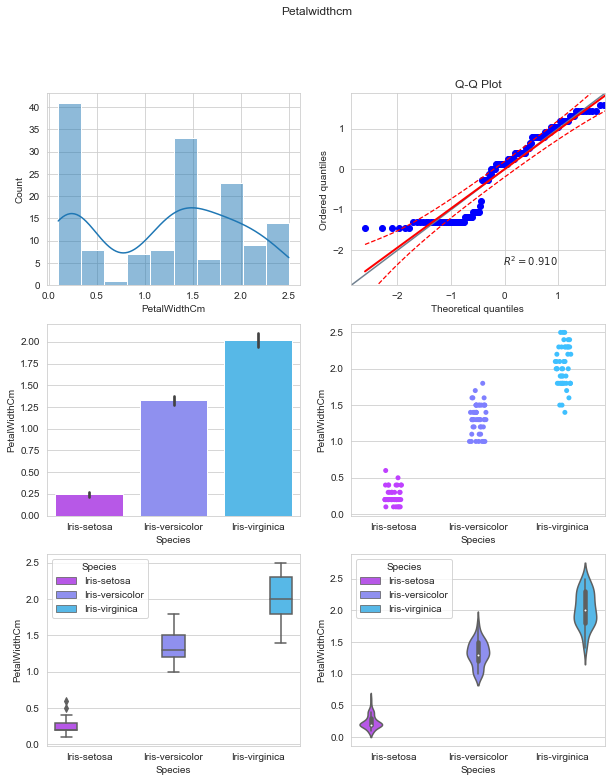

In [89]:
other_plots('SepalLengthCm')
other_plots('SepalWidthCm')
other_plots('PetalLengthCm')
other_plots('PetalWidthCm')

# Preprocessing

In [90]:
y = data['Species']
x = data.drop(data.columns[4], axis=1)

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = pd.DataFrame(encoder.fit_transform(y),)

In [93]:
class_mapping = {index: label for index, label in enumerate(encoder.classes_)}
class_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Train And Test

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Decison Tree Model

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

decision_model = DecisionTreeClassifier()
decision_model.fit(x_train, y_train)
y_pred = decision_model.predict(x_train)

## Dataset Accuracy, Mean Accuracy and Mean F1 Score

In [96]:
print("Training Data Set Accuracy: ", accuracy_score(y_train, y_pred))
print("Validation Mean F1 Score: ",cross_val_score(decision_model, x_train, y_train, cv=5, scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(decision_model, x_train, y_train, cv=5, scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Validation Mean F1 Score:  0.9298637310402016
Validation Mean Accuracy:  0.9333333333333332


[Text(302.25, 448.47, 'X[3] <= 0.292\ngini = 0.664\nsamples = 105\nvalue = [36, 38, 31]'),
 Text(255.75, 366.93, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(348.75, 366.93, 'X[3] <= 0.688\ngini = 0.495\nsamples = 69\nvalue = [0, 38, 31]'),
 Text(232.5, 285.39, 'X[2] <= 0.754\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(186.0, 203.84999999999997, 'X[3] <= 0.646\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]'),
 Text(93.0, 122.31, 'X[2] <= 0.669\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(46.5, 40.76999999999998, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(139.5, 40.76999999999998, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(279.0, 122.31, 'X[2] <= 0.636\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(232.5, 40.76999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(325.5, 40.76999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(279.0, 203.84999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'

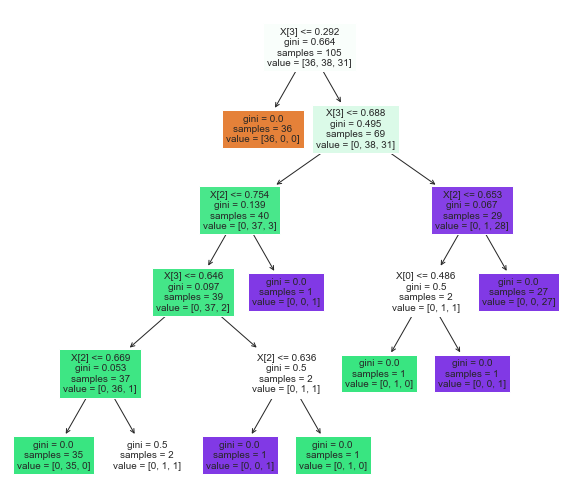

In [97]:
from sklearn import tree
decision_model = tree.DecisionTreeClassifier(max_depth=5)
decision_model.fit(x_train, y_train)
plt.figure(figsize=(10,9))
tree.plot_tree(decision_model, filled=True)

## Building a text report showing the rules of a decision tree.

In [98]:
text_representation = tree.export_text(decision_model)
print(text_representation)

|--- feature_3 <= 0.29
|   |--- class: 0
|--- feature_3 >  0.29
|   |--- feature_3 <= 0.69
|   |   |--- feature_2 <= 0.75
|   |   |   |--- feature_3 <= 0.65
|   |   |   |   |--- feature_2 <= 0.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.67
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.65
|   |   |   |   |--- feature_2 <= 0.64
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  0.64
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.75
|   |   |   |--- class: 2
|   |--- feature_3 >  0.69
|   |   |--- feature_2 <= 0.65
|   |   |   |--- feature_0 <= 0.49
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.49
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.65
|   |   |   |--- class: 2



In [99]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [100]:
y_pred = decision_model.predict(x_test)

# The Result !

In [101]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')

Accuracy Score : 0.9555555555555556


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      1.00      0.92        12
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

